In [4]:
import pandas as pd 
import requests

In [5]:
import tmdbsimple as tmdb
tmdb.API_KEY = 'ccebd49d8e251b9da6d66134043e7384'
tmdb.REQUESTS_TIMEOUT = 5  # seconds, for both connect and read

In [6]:
movie = tmdb.Movies(343611)
response = movie.info()
movie.title

'Jack Reacher: Never Go Back'

In [7]:
search = tmdb.Search()
response = search.movie(query="the little mermaid", primary_release_year=1989)
for s in search.results:
    print(s['title'], s['id'], s['release_date'])
movie = tmdb.Movies(10144)
print(movie.info().keys())

The Little Mermaid 10144 1989-11-17
The Making of 'The Little Mermaid' 777530 1989-01-01
dict_keys(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'origin_country', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count'])


In [40]:
def get_movie_info(title, year):
    search = tmdb.Search()
    search.movie(query=title, year=year)
    try:
        id = search.results[0]['id']
        movie = tmdb.Movies(id)
        response = movie.info()
        budget = movie.budget
        revenue = movie.revenue
        return id, budget, revenue
    except:
        try:
            search.movie(query=title)
            id = search.results[0]['id']
            movie = tmdb.Movies(id)
            response = movie.info()
            budget = movie.budget
            revenue = movie.revenue
            print(title, " release year: ", movie.release_date, "supplied year: ", year)
            return id, budget, revenue
        except:
            print(title, " not found in database")
            return None, None

    

In [9]:
df = pd.read_csv("disney_movies_halfannot.csv")

In [10]:
test_df = df.head()[['Title', 'Year']]

In [11]:
movie_test = test_df.head(1)
print(get_movie_info(movie_test['Title'], movie_test['Year']))

(408, 1488423)


In [12]:
test_df[['ID', 'Budget']] = test_df.apply(lambda row: pd.Series(get_movie_info(row['Title'], row['Year'])), axis=1)
test_df

,Title,Year,ID,Budget
0,Snow White and the Seven Dwarfs,1937,408,1488423
1,Pinocchio,1940,10895,2600000
2,Fantasia,1940,756,2280000
3,The Reluctant Dragon,1941,22752,600
4,Dumbo,1941,11360,812000


In [13]:
df[['ID', 'Budget']] = df.apply(lambda row: pd.Series(get_movie_info(row['Title'], row['Year'])), axis=1)
df

,i,Title,Year,Rating,Branch,Original?
0,0.0,Snow White and the Seven Dwarfs,1937,G,Standard,A
1,1.0,Pinocchio,1940,G,Standard,A
2,2.0,Fantasia,1940,G,Standard,A
3,3.0,The Reluctant Dragon,1941,NaN,Standard,O
4,4.0,Dumbo,1941,G,Standard,A
...,...,...,...,...,...,...
813,807.0,Guardians of the Galaxy Vol. 3,2023,PG-13,Marvel,AS
814,808.0,The Little Mermaid,2023,PG,Standard,R
815,809.0,Elemental,2023,PG,Pixar,O
816,810.0,Indiana Jones and the Dial of Destiny,2023,PG-13,Lucasfilm,S


In [25]:
adaptation_movie_titles = [
    "Barbie",
    "The Super Mario Bros. Movie",
    "Spider-Man: Across the Spider-Verse",
    "Spider-Man: Into the Spider-Verse",
    "Guardians of the Galaxy Vol 3",
    "Guardians of the Galaxy Vol 2",
    "Guardians of the Galaxy",
    "Oppenheimer",
    "The Little Mermaid",
    "The Little Mermaid",
    "Avatar: The Way of Water",
    "Avatar",
    "Ant-Man and the Wasp: Quantumania",
    "Ant-Man and the Wasp",
    "Ant-Man",
    "John Wick: Chapter 4",
    "John-Wick: Chapter 3",
    "John-Wick: Chapter 2",
    "John Wick",
    "Sound of Freedom",
    "TAYLOR SWIFT | THE ERAS TOUR",
    "Indiana Jones and the Dial of Destiny",
    "Indiana Jones and the Kingdom of the Crystal Skull",
    "Indiana Jones and the Last Crusade",
    "Indiana Jones and the Temple of Doom",
    "Raiders of the Lost Ark",
    "Mission: Impossible Dead Reckoning",
    "Mission: Impossible - Fallout",
    "Mission: Impossible - Rogue Nation",
    "Mission: Impossible - Ghost Protocol",
    "Mission: Impossible III",
    "Mission: Impossible 2",
    "Mission: Impossible",
    "The Hunger Games: The Ballad of Songbirds and Snakes",
    "The Hunger Games: Mockingjay Part 2",
    "The Hunger Games: Mockingjay Part 1",
    "The Hunger Games: Catching Fire",
    "The Hunger Games",
    "Transformers: Rise of the Beasts",
    "Bumblebee",
    "Transformers",
    "Transformers: Revenge of the Fallen",
    "Transformers: Dark of the Moon",
    "Transformers: Age of Extinction",
    "Transformers: The Last Knight",
    "Creed III",
    "Creed II",
    "Creed",
    "Rocky Balboa",
    "Rocky V",
    "Rocky IV",
    "Rocky III",
    "Rocky II",
    "Rocky",
    "Elemental",
    "Fast X",
    "F9",
    "Hobbs & Shaw",
    "The Fate of the Furious",
    "Furious 7",
    "Fast & Furious 6",
    "Fast Five",
    "Fast & Furious",
    "Tokyo Drift",
    "2 Fast 2 Furious",
    "The Fast and the Furious",
    "Five Nights at Freddy’s",
    "Wonka",
    "Willy Wonka & the Chocolate Factory",
    "Puss in Boots: The Last Wish",
    "Puss in Boots",
    "Shrek Forever After",
    "Shrek the Third",
    "Shrek 2",
    "Shrek",
    "Teenage Mutant Ninja Turtles: Mutant Mayhem",
    "Teenage Mutant Ninja Turtles",
    "Scream VI",
    "Scream",
    "Scream 4",
    "Scream 3",
    "Scream 2",
    "Scream",
    "The Flash",
    "Trolls Band Together",
    "Trolls World Tour",
    "Trolls",
    "M3GAN",
    "Dungeons & Dragons: Honor Among Thieves",
    "The Equalizer 3",
    "The Equalizer 2",
    "The Equalizer",
    "The Nun II",
    "The Conjuring: The Devil Made Me Do It",
    "Annabelle Comes Home",
    "The Nun",
    "Annabelle: Creation",
    "The Conjuring 2",
    "Annabelle",
    "The Conjuring",
    "The Marvels",
    "Captain Marvel",
    "Meg 2: The Trench",
    "The Meg",
    "Insidious: The Red Door",
    "Insidious: The Last Key",
    "Insidious: Chapter 3",
    "Insidious: Chapter 2",
    "Insidious",
    "Aquaman and the Lost Kingdom",
    "Aquaman",
    "Blue Beetle",
    "Haunted Mansion",
    "Haunted Mansion",
    "Evil Dead Rise",
    "Evil Dead",
    "Evil Dead II",
    "Army of Darkness",
    "The Evil Dead",
    "Killers of the Flower Moon",
    "The Exorcist: Believer",
    "Dominion",
    "Exorcist: The Beginning",
    "The Exorcist III",
    "The Exorcist II: The Heretic",
    "The Exorcist",
    "PAW Patrol: The Mighty Movie",
    "Paw Patrol: The Movie",
    "Cocaine Bear",
    "A Man Called Otto",
    "A Man Called Ove",
    "Wish",
    "Napoleon",
    "Shazam! Fury of the Gods",
    "Shazam!",
    "Migration",
    "Saw X",
    "Saw",
    "Saw II",
    "Saw III",
    "Saw IV",
    "Saw V",
    "Saw VI",
    "Saw 3D",
    "Jigsaw",
    "Spiral",
    "AIR",
    "Jesus Revolution",
    "No Hard Feelings",
    "Talk To Me"
]


In [15]:
adaptation_years = [
    2023, 2023, 2023, 2018, 2023, 2017, 2014, 2023, 2023, 1989, 2022, 2009, 2023, 2018, 2015, 2023, 2019, 2017, 2014, 2023, 
    2023, 2023, 2008, 1989, 1984, 1981, 2023, 2018, 2015, 2011, 2006, 2000, 1996, 2023, 2015, 2014, 2013, 2012, 2023, 2018, 
    2007, 2009, 2011, 2014, 2017, 2023, 2018, 2015, 2006, 1990, 1985, 1982, 1979, 1976, 2023, 2023, 2021, 2019, 2017, 2015, 
    2013, 2011, 2009, 2006, 2003, 2001, 2023, 2023, 1971, 2023, 2011, 2010, 2007, 2004, 2001, 2023, 1990, 2023, 2022, 2011, 
    2000, 1997, 1996, 2023, 2023, 2020, 2016, 2023, 2023, 2023, 2018, 2014, 2023, 2021, 2019, 2018, 2017, 2016, 2014, 2013, 
    2023, 2019, 2023, 2018, 2023, 2018, 2015, 2013, 2011, 2023, 2018, 2023, 2023, 2003, 2023, 2013, 1987, 1993, 1981, 2023, 
    2023, 2005, 2004, 1990, 1977, 1973, 2023, 2021, 2023, 2023, 2015, 2023, 2023, 2023, 2019, 2023, 2023, 2004, 2005, 2006, 
    2007, 2008, 2009, 2010, 2017, 2021, 2023, 2023, 2023, 2023
]


In [38]:
adaptations_df = pd.DataFrame({'title': adaptation_movie_titles, 'year': adaptation_years})

In [41]:
adaptations_df[['id', 'budget', 'revenue']] = adaptations_df.apply(lambda row: pd.Series(get_movie_info(row['title'], row['year'])), axis=1)

In [51]:
pd.options.display.max_rows = 4000
list(adaptations_df['revenue'])

[1445638421,
 1362000000,
 690615475,
 384298736,
 845600000,
 863756051,
 772776600,
 952000000,
 569600000,
 211343479,
 2320250281,
 2923706026,
 476071180,
 622674139,
 519311965,
 440157245,
 326709727,
 171539887,
 88761661,
 250600000,
 261656269,
 383900000,
 786636033,
 474171806,
 333000000,
 389925971,
 567500000,
 791700000,
 682700000,
 694700000,
 398500000,
 546400000,
 457700000,
 337134868,
 653428261,
 755356711,
 865011746,
 694394724,
 439000000,
 467989645,
 709700000,
 836300000,
 1123800000,
 1104100000,
 605400000,
 275300000,
 214200000,
 173600000,
 155900000,
 120000000,
 300500000,
 270000000,
 85200000,
 225300000,
 496000000,
 704709660,
 726229501,
 760098996,
 1236000000,
 1515400000,
 788700000,
 626100000,
 363164265,
 158964610,
 236350661,
 207283925,
 294803785,
 632302312,
 4000000,
 484700000,
 554987477,
 752600867,
 813367380,
 932339342,
 488628188,
 180000000,
 201965915,
 169000000,
 137700000,
 97200000,
 161800000,
 172400000,
 173100000,
 

# All Box Office Financials 1977-2023

In [58]:
all_bo_df = pd.read_csv('spr24/allboxoffice.csv')
all_bo_df.head()

,Rank,Release,Gross,Max Th,Opening,% of Total,Open Th,Open,Close,Distributor,Year
0,1,Barbie,"636,238,421.00","4,337","162,022,044.00",25.50%,"4,243",Jul 21,-,Warner Bros.,2023
1,2,The Super Mario Bros. Movie,"574,934,330.00","4,371","146,361,865.00",25.50%,"4,343",Apr 5,Sep 7,Universal Pictures,2023
2,3,Spider-Man: Across the Spider-Verse,"381,311,319.00","4,332","120,663,589.00",31.60%,"4,313",Jun 2,Sep 14,Columbia Pictures,2023
3,4,Guardians of the Galaxy Vol. 3,"358,995,815.00","4,450","118,414,021.00",33.00%,"4,450",May 5,-,Walt Disney Studios Motion Pictures,2023
4,5,Oppenheimer,"329,862,540.00","3,761","82,455,420.00",25.00%,"3,610",Jul 21,-,Universal Pictures,2023


In [59]:
all_bo_df[['id', 'budget', 'TMDBrevenue']] = all_bo_df.apply(lambda row: pd.Series(get_movie_info(row['Release'], row['Year'])), axis=1)

Avatar 2022 Re-release  not found in database
Hocus Pocus2020 Re-release  not found in database
Star Wars: Episode V - The Empire Strikes Back2020 Re-release  not found in database
The Lion King2011 3D Release  not found in database
Knight and Day2010 Re-release  not found in database
Star Wars: Episode IV - A New Hope1997 Special Edition  not found in database
Star Wars: Episode V - The Empire Strikes Back1997 Special Edition  not found in database
Star Wars: Episode VI - Return of the Jedi1997 Special Edition  not found in database
Snow White and the Seven Dwarfs1993 Re-release  not found in database
One Hundred and One Dalmatians1991 Re-release  not found in database
The Jungle Book1990 Re-release  not found in database
Fantasia1990 Re-release  not found in database
Peter Pan1989 Re-release  not found in database
Bambi1988 Re-release  not found in database
The Fox and the Hound1988 Re-release  not found in database
Snow White and the Seven Dwarfs1987 Re-release  not found in databas

In [221]:
# suppress scientific notation by setting float_format
pd.options.display.float_format = '{:.2f}'.format

In [93]:
all_bo_df.at[94, 'budget'] = 0

In [69]:
err_titles = all_bo_df[all_bo_df['budget'] == 0]['Release']

In [319]:
import matplotlib.pyplot as plt
import numpy as np
import cpi

In [231]:
clean_df = all_bo_df[all_bo_df.budget != 0]
clean_df = clean_df[clean_df.TMDBrevenue != 0]
clean_df.dropna(inplace=True)
clean_df.replace('-', '-1', inplace=True)
clean_df.rename(columns={'TMDBrevenue': 'Worldwide Gross', 'Gross': 'Domestic Gross'}, inplace=True)

clean_df.at[1572, 'Worldwide Gross'] = 94000000
clean_df.at[1572, 'budget'] = 26000000
clean_df.at[91, 'budget'] = 94000000

In [232]:
clean_df['Domestic Gross'] = [float(num.replace(',','')) for num in clean_df['Domestic Gross']]
clean_df['Opening'] = [float(num.replace(',','')) for num in clean_df['Opening']]
clean_df['% of Total'] = [num.replace('<','') for num in clean_df['% of Total']]
clean_df['% of Total'] = [float(num.replace('%',''))/100.0 for num in clean_df['% of Total']]
clean_df['Max Th'] = [float(num.replace(',','')) for num in clean_df['Max Th']]
clean_df['Open Th'] = [float(num.replace(',','')) for num in clean_df['Open Th']]
clean_df.replace(-.01, np.nan, inplace=True)
clean_df.replace(-1, np.nan, inplace=True)
clean_df.replace('-1', '-', inplace=True)

In [321]:
adj_df = clean_df
adj_df['Domestic Gross'] = adj_df.apply(
    lambda row: cpi.inflate(row['Domestic Gross'], row['Year'], to=2023), axis=1
)
adj_df['Worldwide Gross'] = adj_df.apply(
    lambda row: cpi.inflate(row['Worldwide Gross'], row['Year'], to=2023), axis=1
)
adj_df['budget'] = adj_df.apply(
    lambda row: cpi.inflate(row['budget'], row['Year'], to=2023), axis=1
)
adj_df['Profit'] = adj_df['Worldwide Gross'] - adj_df['budget']

adj_df.head(10)

,Rank,Release,Domestic Gross,Max Th,Opening,% of Total,Open Th,Open,Close,Distributor,Year,id,budget,Worldwide Gross,Profit,Release_Date
0,1,Barbie,636238421.00,4337.00,162022044.00,0.26,4243.00,Jul 21,-,Warner Bros.,2023,346698.00,145000000.00,1445638421.00,1300638421.00,2023-07-21
1,2,The Super Mario Bros. Movie,574934330.00,4371.00,146361865.00,0.26,4343.00,Apr 5,Sep 7,Universal Pictures,2023,502356.00,100000000.00,1362000000.00,1262000000.00,2023-04-05
2,3,Spider-Man: Across the Spider-Verse,381311319.00,4332.00,120663589.00,0.32,4313.00,Jun 2,Sep 14,Columbia Pictures,2023,569094.00,100000000.00,690615475.00,590615475.00,2023-06-02
3,4,Guardians of the Galaxy Vol. 3,358995815.00,4450.00,118414021.00,0.33,4450.00,May 5,-,Walt Disney Studios Motion Pictures,2023,447365.00,250000000.00,845600000.00,595600000.00,2023-05-05
4,5,Oppenheimer,329862540.00,3761.00,82455420.00,0.25,3610.00,Jul 21,-,Universal Pictures,2023,872585.00,100000000.00,952000000.00,852000000.00,2023-07-21
5,6,The Little Mermaid,298172056.00,4320.00,95578040.00,0.32,4320.00,May 26,Sep 14,Walt Disney Studios Motion Pictures,2023,447277.00,297000000.00,569600000.00,272600000.00,2023-05-26
6,7,Wonka,218402312.00,4213.00,39005800.00,0.18,4203.00,Dec 15,-,Warner Bros.,2023,787699.00,125000000.00,632302312.00,507302312.00,2023-12-15
7,8,Ant-Man and the Wasp: Quantumania,214504909.00,4345.00,106109650.00,0.49,4345.00,Feb 17,Jun 15,Walt Disney Studios Motion Pictures,2023,640146.00,200000000.00,476071180.00,276071180.00,2023-02-17
8,9,John Wick: Chapter 4,187131806.00,3855.00,73817950.00,0.39,3855.00,Mar 24,Jun 15,Lionsgate Films,2023,603692.00,90000000.00,440157245.00,350157245.00,2023-03-24
9,10,Sound of Freedom,184178046.00,3411.00,19680879.00,0.11,2852.00,Jul 4,-,Angel Studios,2023,678512.00,14500000.00,250600000.00,236100000.00,2023-07-04


In [233]:
clean_df.sort_values(by='budget').head(10)

,Rank,Release,Domestic Gross,Max Th,Opening,% of Total,Open Th,Open,Close,Distributor,Year,id,budget,Worldwide Gross
1209,10,The Blair Witch Project,140539099.00,2538.00,1512054.00,0.01,27.00,Jul 16,-,Artisan Entertainment,1999,2667.00,60000.00,248639099.00
729,30,Paranormal Activity,107918810.00,2712.00,77873.00,0.00,12.00,Sep 25,Jan 21,Paramount Pictures,2009,23827.00,215000.00,193355800.00
2246,47,Phantasm,11988469.00,NaN,NaN,NaN,NaN,Jun 1,-,AVCO Embassy Pictures,1979,9638.00,300000.00,11988469.00
2259,10,Halloween,47000000.00,NaN,NaN,NaN,NaN,Oct 25,-,-,1978,948.00,325000.00,70300000.00
2040,41,Valley Girl,17343596.00,442.00,1856780.00,0.11,442.00,Apr 29,-,Atlantic Releasing Corporation,1983,19053.00,350000.00,17343596.00
2167,18,Friday the 13th,39754601.00,1100.00,5816321.00,0.15,1100.00,May 9,-,Paramount Pictures,1980,4488.00,550000.00,59800000.00
2140,41,The Howling,17985893.00,NaN,NaN,NaN,NaN,Apr 10,-,Embassy Pictures,1981,11298.00,1000000.00,17985893.00
1915,16,The Breakfast Club,45875171.00,1118.00,5107599.00,0.11,1071.00,Feb 15,-,Universal Pictures,1985,2108.00,1000000.00,51525171.00
2180,31,The Fog,21378361.00,NaN,NaN,NaN,NaN,Feb 1,-,AVCO Embassy Pictures,1980,790.00,1000000.00,21448830.00
2232,33,La Cage aux Folles,20424259.00,5.00,18709.00,0.00,5.00,Mar 30,-,Metro-Goldwyn-Mayer (MGM),1979,4484.00,1100000.00,20424259.00


In [242]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2117 entries, 0 to 2328
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             2117 non-null   int64  
 1   Release          2117 non-null   object 
 2   Domestic Gross   2117 non-null   float64
 3   Max Th           2044 non-null   float64
 4   Opening          2033 non-null   float64
 5   % of Total       2010 non-null   float64
 6   Open Th          2036 non-null   float64
 7   Open             2117 non-null   object 
 8   Close            2117 non-null   object 
 9   Distributor      2117 non-null   object 
 10  Year             2117 non-null   int64  
 11  id               2117 non-null   float64
 12  budget           2117 non-null   float64
 13  Worldwide Gross  2117 non-null   float64
dtypes: float64(8), int64(2), object(4)
memory usage: 312.6+ KB


In [243]:
clean_df['Profit'] = clean_df['Worldwide Gross'] - clean_df['budget']

In [301]:
clean_df['Release_Date'] = clean_df['Open'] + ' ' + clean_df['Year'].astype(str)
clean_df['Release_Date'] = pd.to_datetime(clean_df['Release_Date'], format='%b %d %Y')

In [1]:
adj_df.to_csv('spr24/allbo_financials.csv')

NameError: name 'adj_df' is not defined

## EDA

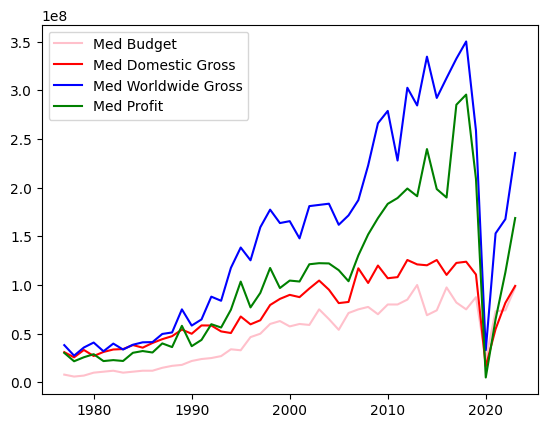

In [249]:
plt.plot(clean_df.Year, clean_df.groupby('Year')['budget'].transform('median'), color='pink')
plt.plot(clean_df.Year, clean_df.groupby('Year')['Domestic Gross'].transform('median'), color='red')
plt.plot(clean_df.Year, clean_df.groupby('Year')['Worldwide Gross'].transform('median'), color='blue')
plt.plot(clean_df.Year, clean_df.groupby('Year')['Profit'].transform('median'), color='green')
plt.legend(['Med Budget', 'Med Domestic Gross', 'Med Worldwide Gross', 'Med Profit'])

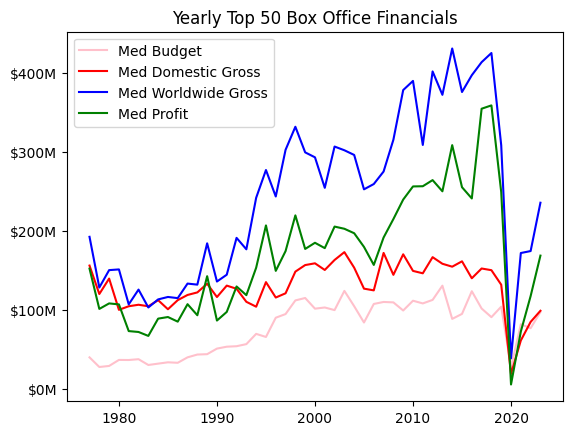

In [338]:
plt.plot(adj_df.Year, adj_df.groupby('Year')['budget'].transform('median'), color='pink')
plt.plot(adj_df.Year, adj_df.groupby('Year')['Domestic Gross'].transform('median'), color='red')
plt.plot(adj_df.Year, adj_df.groupby('Year')['Worldwide Gross'].transform('median'), color='blue')
plt.plot(adj_df.Year, adj_df.groupby('Year')['Profit'].transform('median'), color='green')
plt.legend(['Med Budget', 'Med Domestic Gross', 'Med Worldwide Gross', 'Med Profit'])
plt.title('Yearly Top 50 Box Office Financials')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

In [323]:
top_25 = adj_df[clean_df['Rank'] <= 25]

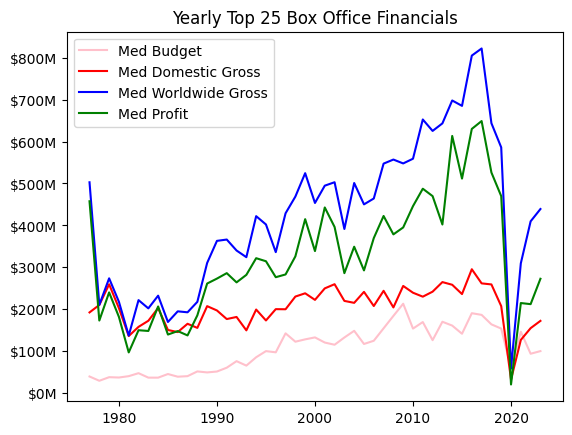

In [337]:
plt.plot(top_25.Year, top_25.groupby('Year')['budget'].transform('median'), color='pink')
plt.plot(top_25.Year, top_25.groupby('Year')['Domestic Gross'].transform('median'), color='red')
plt.plot(top_25.Year, top_25.groupby('Year')['Worldwide Gross'].transform('median'), color='blue')
plt.plot(top_25.Year, top_25.groupby('Year')['Profit'].transform('median'), color='green')
plt.legend(['Med Budget', 'Med Domestic Gross', 'Med Worldwide Gross', 'Med Profit'])
plt.title('Yearly Top 25 Box Office Financials')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

In [331]:
post_covid = adj_df[adj_df['Year'] > 2020]


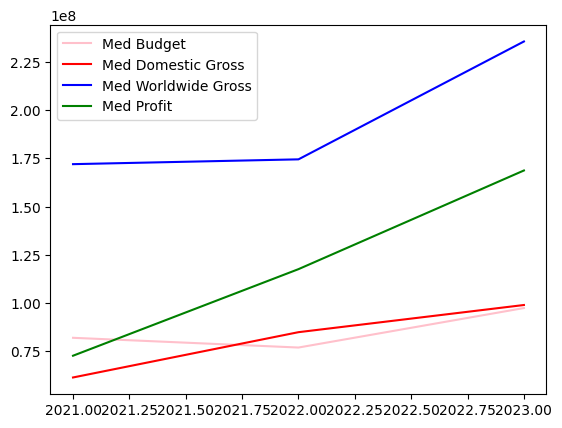

In [332]:
plt.plot(post_covid.Year, post_covid.groupby('Year')['budget'].transform('median'), color='pink')
plt.plot(post_covid.Year, post_covid.groupby('Year')['Domestic Gross'].transform('median'), color='red')
plt.plot(post_covid.Year, post_covid.groupby('Year')['Worldwide Gross'].transform('median'), color='blue')
plt.plot(post_covid.Year, post_covid.groupby('Year')['Profit'].transform('median'), color='green')
plt.legend(['Med Budget', 'Med Domestic Gross', 'Med Worldwide Gross', 'Med Profit'])

In [333]:
top_5 = adj_df[adj_df['Rank'] <= 5]

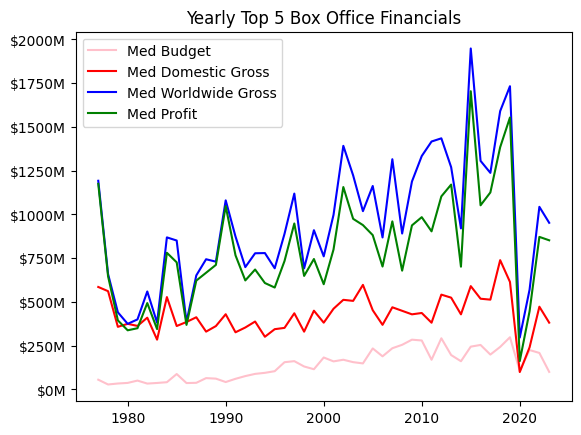

In [340]:
plt.plot(top_5.Year, top_5.groupby('Year')['budget'].transform('median'), color='pink')
plt.plot(top_5.Year, top_5.groupby('Year')['Domestic Gross'].transform('median'), color='red')
plt.plot(top_5.Year, top_5.groupby('Year')['Worldwide Gross'].transform('median'), color='blue')
plt.plot(top_5.Year, top_5.groupby('Year')['Profit'].transform('median'), color='green')
plt.legend(['Med Budget', 'Med Domestic Gross', 'Med Worldwide Gross', 'Med Profit'])
plt.title('Yearly Top 5 Box Office Financials')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

In [335]:
post_monthly_budg = post_covid.groupby(post_covid['Release_Date'].dt.to_period('M').dt.to_timestamp()).agg({'budget': 'mean'}).reset_index()
post_monthly_prof = post_covid.groupby(post_covid['Release_Date'].dt.to_period('M').dt.to_timestamp()).agg({'Profit': 'mean'}).reset_index()
post_monthly_dom =  post_covid.groupby(post_covid['Release_Date'].dt.to_period('M').dt.to_timestamp()).agg({'Domestic Gross': 'mean'}).reset_index()
post_monthly_world = post_covid.groupby(post_covid['Release_Date'].dt.to_period('M').dt.to_timestamp()).agg({'Worldwide Gross': 'mean'}).reset_index()

In [459]:
from matplotlib.ticker import FuncFormatter
def millions_formatter(x, pos):
    return f'${x * 1e-6:0.0f}M'
def billions_formatter(x, pos):
    return f'${x * 1e-9:0.00f}B'

(array([18628., 18748., 18871., 18993., 19113., 19236., 19358., 19478.,
        19601., 19723.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18748.0, 0, '2021-05'),
  Text(18871.0, 0, '2021-09'),
  Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05'),
  Text(19236.0, 0, '2022-09'),
  Text(19358.0, 0, '2023-01'),
  Text(19478.0, 0, '2023-05'),
  Text(19601.0, 0, '2023-09'),
  Text(19723.0, 0, '2024-01')])

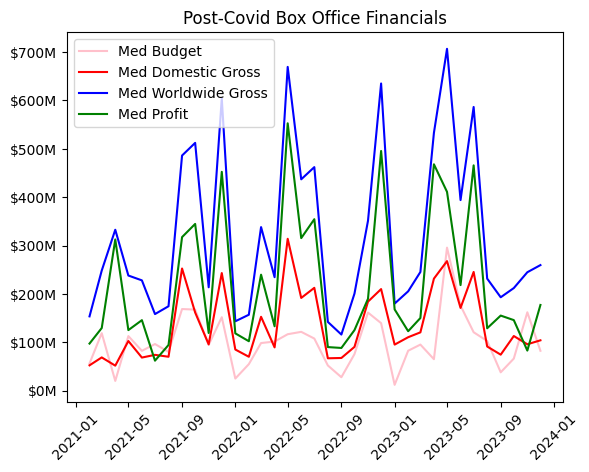

In [336]:
plt.plot(post_monthly_budg['Release_Date'], post_monthly_budg['budget'], color='pink')
plt.plot(post_monthly_world['Release_Date'], post_monthly_dom['Domestic Gross'], color='red')
plt.plot(post_monthly_dom['Release_Date'], post_monthly_world['Worldwide Gross'], color='blue')
plt.plot(post_monthly_prof['Release_Date'], post_monthly_prof['Profit'], color='green')
plt.legend(['Med Budget', 'Med Domestic Gross', 'Med Worldwide Gross', 'Med Profit'])
plt.title('Post-Covid Box Office Financials')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.xticks(rotation=45)
#plt.legend(['Budget', 'Domestic Gross', 'Profit'])

In [350]:
post_covid.sort_values(by='Release_Date', ascending=False).head(50)

,Rank,Release,Domestic Gross,Max Th,Opening,% of Total,Open Th,Open,Close,Distributor,Year,id,budget,Worldwide Gross,Profit,Release_Date
46,47,The Boys in the Boat,52641306.00,2687.00,8400548.00,0.16,2557.00,Dec 25,-,-,2023,823452.00,40000000.00,54401583.00,14401583.00,2023-12-25
42,43,The Color Purple,60619191.00,3218.00,11737072.00,0.19,3203.00,Dec 25,-,Warner Bros.,2023,558915.00,95000000.00,67519191.00,-27480809.00,2023-12-25
19,20,Migration,127306285.00,3839.00,12453275.00,0.10,3761.00,Dec 22,-,Universal Pictures,2023,940551.00,72000000.00,297404638.00,225404638.00,2023-12-22
20,21,Aquaman and the Lost Kingdom,124481226.00,3787.00,27686211.00,0.22,3706.00,Dec 22,-,Warner Bros.,2023,572802.00,205000000.00,434381226.00,229381226.00,2023-12-22
28,29,Anyone But You,88319668.00,3055.00,6000344.00,0.07,3055.00,Dec 22,-,Columbia Pictures,2023,1072790.00,25000000.00,214891370.00,189891370.00,2023-12-22
6,7,Wonka,218402312.00,4213.00,39005800.00,0.18,4203.00,Dec 15,-,Warner Bros.,2023,787699.00,125000000.00,632302312.00,507302312.00,2023-12-15
44,45,Godzilla Minus One,56418793.00,2622.00,11419975.00,0.20,2308.00,Dec 1,-,-,2023,940721.00,15000000.00,115857413.00,100857413.00,2023-12-01
41,42,Napoleon,61524375.00,3500.00,20638887.00,0.34,3500.00,Nov 22,-,Columbia Pictures,2023,753342.00,165000000.00,220597098.00,55597098.00,2023-11-22
40,41,Wish,63973821.00,3900.00,19698228.00,0.31,3900.00,Nov 22,-,Walt Disney Studios Motion Pictures,2023,1022796.00,175000000.00,251720820.00,76720820.00,2023-11-22
13,14,The Hunger Games: The Ballad of Songbirds & Sn...,166350594.00,3776.00,44607143.00,0.27,3776.00,Nov 17,-,Lionsgate Films,2023,695721.00,100000000.00,337134868.00,237134868.00,2023-11-17


In [ ]:
plt.plot(post_covid.Year, post_covid.resample('Release_Date')['budget'].transform('median'), color='pink')
plt.plot(post_covid.Year, post_covid.groupby('Year')['Domestic Gross'].transform('median'), color='red')
plt.plot(post_covid.Year, post_covid.groupby('Year')['Worldwide Gross'].transform('median'), color='blue')
plt.plot(post_covid.Year, post_covid.groupby('Year')['Profit'].transform('median'), color='green')
plt.legend(['Med Budget', 'Med Domestic Gross', 'Med Worldwide Gross', 'Med Profit'])

In [346]:
qpost_monthly_budg = post_covid.groupby(post_covid['Release_Date'].dt.to_period('Q').dt.to_timestamp()).agg({'budget': 'mean'}).reset_index()
qpost_monthly_prof = post_covid.groupby(post_covid['Release_Date'].dt.to_period('Q').dt.to_timestamp()).agg({'Profit': 'mean'}).reset_index()
qpost_monthly_dom =  post_covid.groupby(post_covid['Release_Date'].dt.to_period('Q').dt.to_timestamp()).agg({'Domestic Gross': 'mean'}).reset_index()
qpost_monthly_world = post_covid.groupby(post_covid['Release_Date'].dt.to_period('Q').dt.to_timestamp()).agg({'Worldwide Gross': 'mean'}).reset_index()

(array([18628., 18748., 18871., 18993., 19113., 19236., 19358., 19478.,
        19601.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18748.0, 0, '2021-05'),
  Text(18871.0, 0, '2021-09'),
  Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05'),
  Text(19236.0, 0, '2022-09'),
  Text(19358.0, 0, '2023-01'),
  Text(19478.0, 0, '2023-05'),
  Text(19601.0, 0, '2023-09')])

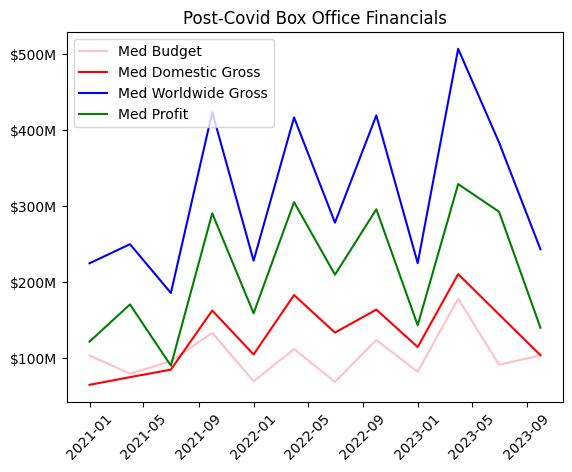

In [347]:
plt.plot(qpost_monthly_budg['Release_Date'], qpost_monthly_budg['budget'], color='pink')
plt.plot(qpost_monthly_world['Release_Date'], qpost_monthly_dom['Domestic Gross'], color='red')
plt.plot(qpost_monthly_dom['Release_Date'], qpost_monthly_world['Worldwide Gross'], color='blue')
plt.plot(qpost_monthly_prof['Release_Date'], qpost_monthly_prof['Profit'], color='green')
plt.legend(['Med Budget', 'Med Domestic Gross', 'Med Worldwide Gross', 'Med Profit'])
plt.title('Post-Covid Box Office Financials')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.xticks(rotation=45)
#plt.legend(['Budget', 'Domestic Gross', 'Profit'])

## Linked Node Box Office 

In [391]:
allnodes_df = pd.read_csv('spr24/allnodes.csv')
linked_movies = allnodes_df[allnodes_df['Medium'] == 'Movie']

In [392]:
linked_movies.drop(['Wiki_Link', 'Image_Link', 'Medium', 'ID'], axis=1, inplace=True)

/var/folders/8b/76lk071d1dn3ck38wkf1wknw0000gn/T/ipykernel_44866/3834646398.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [393]:
linked_movies['Year'] = linked_movies['Year'].astype('int')

/var/folders/8b/76lk071d1dn3ck38wkf1wknw0000gn/T/ipykernel_44866/3675968858.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [394]:
# Adjust for Inflation

linked_movies['Domestic_Gross'] = linked_movies.apply(
    lambda row: cpi.inflate(row['Domestic_Gross'], row['Year'], to=2023), axis=1
)
linked_movies['Worldwide_Gross'] = linked_movies.apply(
    lambda row: cpi.inflate(row['Worldwide_Gross'], row['Year'], to=2023), axis=1
)
linked_movies['Production_Budget'] = linked_movies.apply(
    lambda row: cpi.inflate(row['Production_Budget'], row['Year'], to=2023), axis=1
)
linked_movies['Profit'] = linked_movies.apply(
    lambda row: cpi.inflate(row['Profit'], row['Year'], to=2023), axis=1
)

/var/folders/8b/76lk071d1dn3ck38wkf1wknw0000gn/T/ipykernel_44866/263986511.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8b/76lk071d1dn3ck38wkf1wknw0000gn/T/ipykernel_44866/263986511.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8b/76lk071d1dn3ck38wkf1wknw0000gn/T/ipykernel_44866/263986511.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [403]:
import plotly.express as px

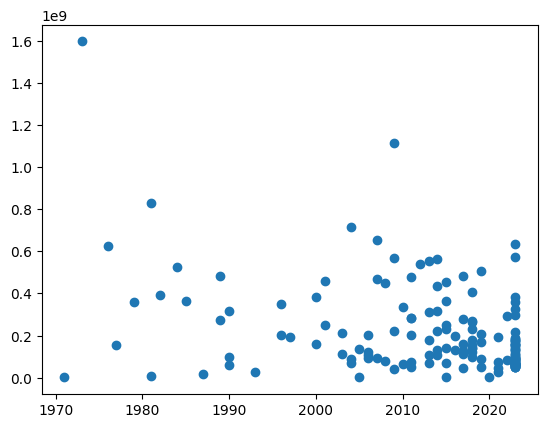

In [396]:
plt.scatter(linked_movies['Year'], linked_movies['Domestic_Gross'])

### Chart Planning
- Basic domestic scatter over years
- worldwide scatter over years w budget and profit
- worldwide line avgs over years w budget and profit colored
- isolate scatter by main 3 franchises: MI, FF, Marvel using ‘BoxOff_Rank’
- mark Original on performance metrics (w/ color?)

In [451]:
px.scatter(x=linked_movies['Year'], y=linked_movies['Domestic_Gross'], data_frame=linked_movies,
           color=linked_movies['Original'].astype(bool), 
           hover_data={'Item': True, 'Year':True, 'Domestic_Gross': True, 'Original': True},
           title='Domestic Gross - Linked Nodes')

In [408]:
df_long = linked_movies.melt(id_vars=['Year', 'Item'], value_vars=['Worldwide_Gross','Production_Budget'], var_name='type', value_name='amount')
fig = px.scatter(df_long, x='Year', y='amount', color='type', 
                 labels={'amount': 'Amount ($)', 'Item': 'Movie Title', 'type': 'Type'},
                 title='Budget and Gross of Movies')
fig.show()

Text(0.5, 1.0, 'Mean Performance Worldwide - Linked Nodes')

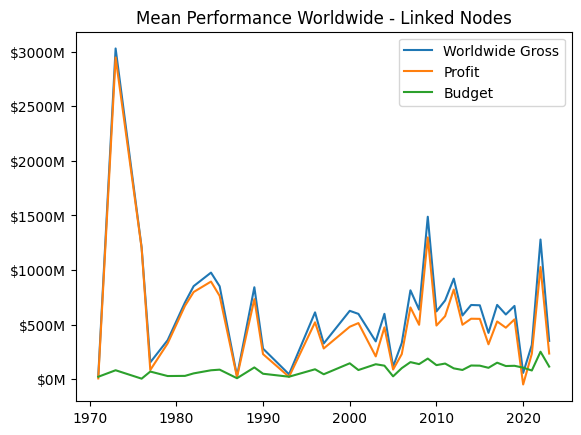

In [461]:
year_df = linked_movies.groupby('Year', as_index=False)[['Worldwide_Gross', 'Domestic_Gross', 'Production_Budget', 'Profit']].mean()
plt.plot(year_df['Year'], year_df['Worldwide_Gross'])
plt.plot(year_df['Year'], year_df['Profit'])
plt.plot(year_df['Year'], year_df['Production_Budget'])
plt.legend(['Worldwide Gross', 'Profit', 'Budget'])
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title("Mean Performance Worldwide - Linked Nodes")

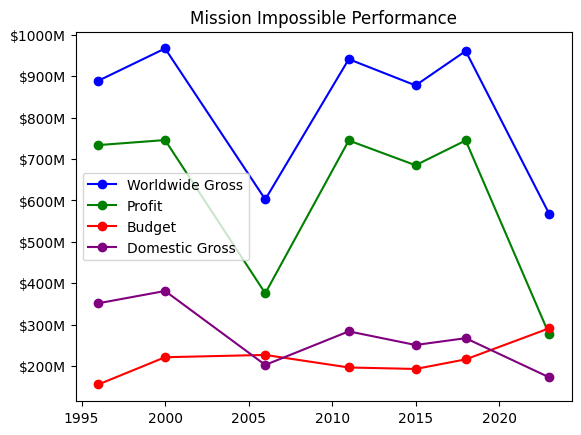

In [463]:
mi_df = linked_movies[linked_movies['BoxOff_Rank'] == 13]
plt.plot(mi_df['Year'], mi_df['Worldwide_Gross'], color='blue', marker='o')
plt.plot(mi_df['Year'], mi_df['Profit'], color='green', marker='o')
plt.plot(mi_df['Year'], mi_df['Production_Budget'], color='red', marker='o')
plt.plot(mi_df['Year'], mi_df['Domestic_Gross'], color = 'purple', marker='o')
plt.legend(['Worldwide Gross', 'Profit', 'Budget', 'Domestic Gross'])
plt.title("Mission Impossible Performance")
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

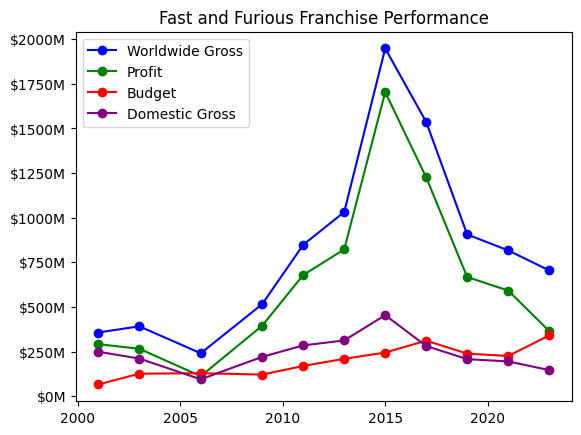

In [464]:
ff_df = linked_movies[linked_movies['BoxOff_Rank'] == 18]
plt.plot(ff_df['Year'], ff_df['Worldwide_Gross'], color='blue', marker='o')
plt.plot(ff_df['Year'], ff_df['Profit'], color='green', marker='o')
plt.plot(ff_df['Year'], ff_df['Production_Budget'], color='red', marker='o')
plt.plot(ff_df['Year'], ff_df['Domestic_Gross'], color = 'purple', marker='o')
plt.legend(['Worldwide Gross', 'Profit', 'Budget', 'Domestic Gross'])
plt.title("Fast and Furious Franchise Performance")
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

/var/folders/8b/76lk071d1dn3ck38wkf1wknw0000gn/T/ipykernel_44866/527487451.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



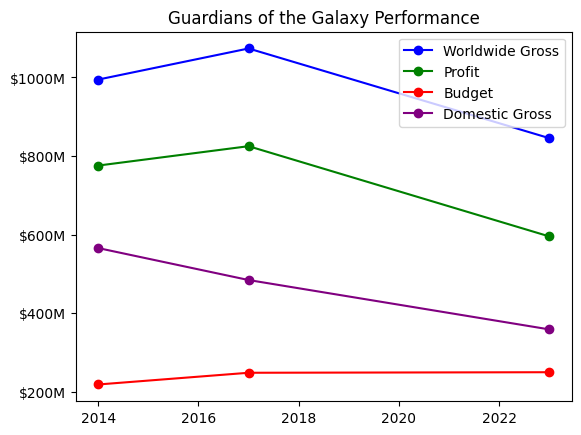

In [471]:
mar_df = linked_movies[(linked_movies['BoxOff_Rank'] == 4)] #| (linked_movies['BoxOff_Rank'] == 8) | (linked_movies['BoxOff_Rank'] == 30)]
mar_df.sort_values(by='Year', inplace=True)
plt.plot(mar_df['Year'], mar_df['Worldwide_Gross'], color='blue', marker='o')
plt.plot(mar_df['Year'], mar_df['Profit'], color='green', marker='o')
plt.plot(mar_df['Year'], mar_df['Production_Budget'], color='red', marker='o')
plt.plot(mar_df['Year'], mar_df['Domestic_Gross'], color = 'purple', marker='o')
plt.legend(['Worldwide Gross', 'Profit', 'Budget', 'Domestic Gross'])
plt.title("Guardians of the Galaxy Performance")
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

/var/folders/8b/76lk071d1dn3ck38wkf1wknw0000gn/T/ipykernel_44866/1927371062.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



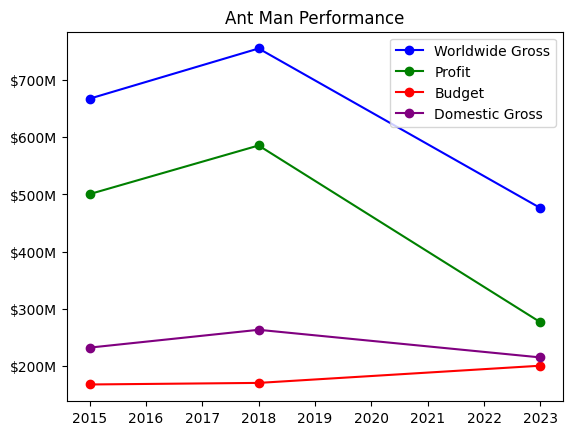

In [470]:
mar_df = linked_movies[(linked_movies['BoxOff_Rank'] == 8)] 
mar_df.sort_values(by='Year', inplace=True)
plt.plot(mar_df['Year'], mar_df['Worldwide_Gross'], color='blue', marker='o')
plt.plot(mar_df['Year'], mar_df['Profit'], color='green', marker='o')
plt.plot(mar_df['Year'], mar_df['Production_Budget'], color='red', marker='o')
plt.plot(mar_df['Year'], mar_df['Domestic_Gross'], color = 'purple', marker='o')
plt.legend(['Worldwide Gross', 'Profit', 'Budget', 'Domestic Gross'])
plt.title("Ant Man Performance")
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

/var/folders/8b/76lk071d1dn3ck38wkf1wknw0000gn/T/ipykernel_44866/2756231895.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



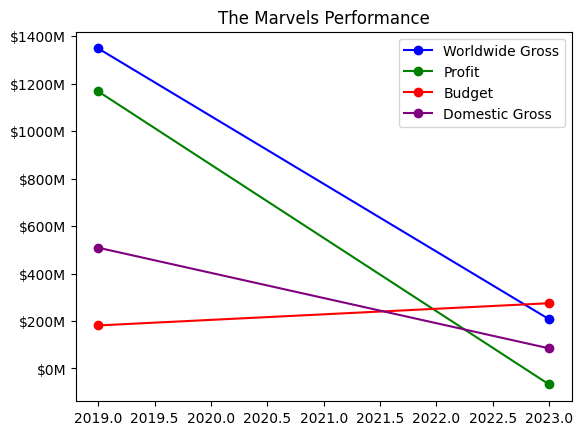

In [469]:
mar_df = linked_movies[(linked_movies['BoxOff_Rank'] == 30)] #| (linked_movies['BoxOff_Rank'] == 8) | (linked_movies['BoxOff_Rank'] == 30)]
mar_df.sort_values(by='Year', inplace=True)
plt.plot(mar_df['Year'], mar_df['Worldwide_Gross'], color='blue', marker='o')
plt.plot(mar_df['Year'], mar_df['Profit'], color='green', marker='o')
plt.plot(mar_df['Year'], mar_df['Production_Budget'], color='red', marker='o')
plt.plot(mar_df['Year'], mar_df['Domestic_Gross'], color = 'purple', marker='o')
plt.legend(['Worldwide Gross', 'Profit', 'Budget', 'Domestic Gross'])
plt.title("The Marvels Performance")
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

/var/folders/8b/76lk071d1dn3ck38wkf1wknw0000gn/T/ipykernel_44866/2027293094.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



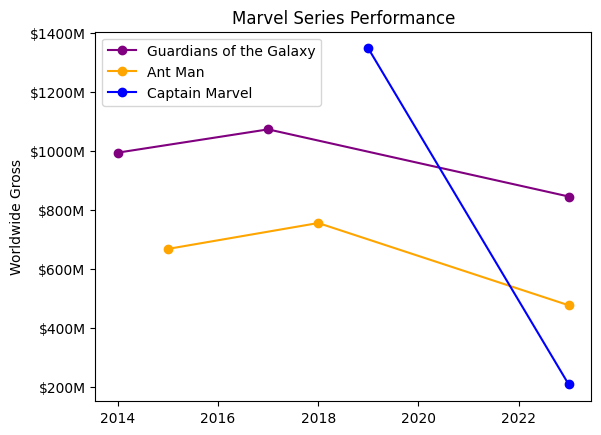

In [475]:
guard_df = linked_movies[(linked_movies['BoxOff_Rank'] == 4)] #| (linked_movies['BoxOff_Rank'] == 8) | (linked_movies['BoxOff_Rank'] == 30)]
ant_df = linked_movies[(linked_movies['BoxOff_Rank'] == 8)]
mars_df = linked_movies[(linked_movies['BoxOff_Rank'] == 30)]
mar_df.sort_values(by='Year', inplace=True)
plt.plot(guard_df['Year'], guard_df['Worldwide_Gross'], color='purple', marker='o')
plt.plot(ant_df['Year'], ant_df['Worldwide_Gross'], color='orange', marker='o')
plt.plot(mars_df['Year'], mars_df['Worldwide_Gross'], color='blue', marker='o')
#plt.plot(mar_df['Year'], mar_df['Profit'], color='green', marker='o')
# plt.plot(mar_df['Year'], mar_df['Production_Budget'], color='red', marker='o')
# plt.plot(mar_df['Year'], mar_df['Domestic_Gross'], color = 'purple', marker='o')
plt.legend(['Guardians of the Galaxy', 'Ant Man', 'Captain Marvel'])
plt.title("Marvel Series Performance")
plt.ylabel('Worldwide Gross')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

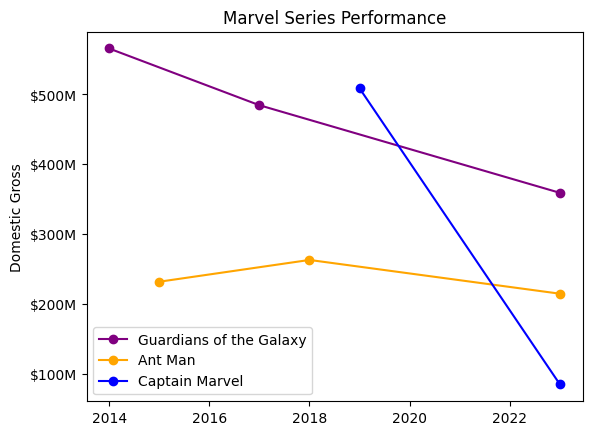

In [476]:
plt.plot(guard_df['Year'], guard_df['Domestic_Gross'], color='purple', marker='o')
plt.plot(ant_df['Year'], ant_df['Domestic_Gross'], color='orange', marker='o')
plt.plot(mars_df['Year'], mars_df['Domestic_Gross'], color='blue', marker='o')
#plt.plot(mar_df['Year'], mar_df['Profit'], color='green', marker='o')
# plt.plot(mar_df['Year'], mar_df['Production_Budget'], color='red', marker='o')
# plt.plot(mar_df['Year'], mar_df['Domestic_Gross'], color = 'purple', marker='o')
plt.legend(['Guardians of the Galaxy', 'Ant Man', 'Captain Marvel'])
plt.title("Marvel Series Performance")
plt.ylabel('Domestic Gross')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

/var/folders/8b/76lk071d1dn3ck38wkf1wknw0000gn/T/ipykernel_44866/567389774.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



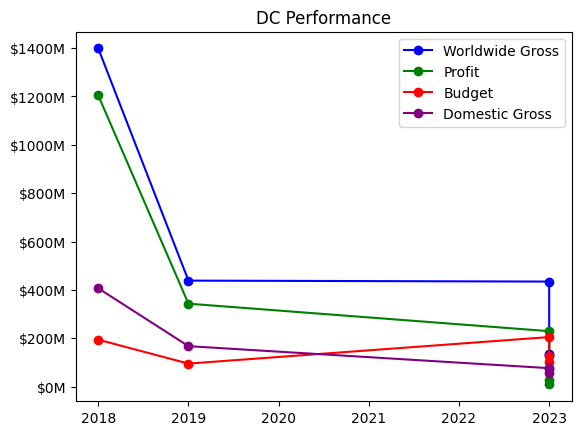

In [466]:
dc_df = linked_movies[(linked_movies['BoxOff_Rank'] == 33) | (linked_movies['BoxOff_Rank'] == 34) | (linked_movies['BoxOff_Rank'] == 44)]
dc_df.sort_values(by='Year', inplace=True)
plt.plot(dc_df['Year'], dc_df['Worldwide_Gross'], color='blue', marker='o')
plt.plot(dc_df['Year'], dc_df['Profit'], color='green', marker='o')
plt.plot(dc_df['Year'], dc_df['Production_Budget'], color='red', marker='o')
plt.plot(dc_df['Year'], dc_df['Domestic_Gross'], color = 'purple', marker='o')
plt.legend(['Worldwide Gross', 'Profit', 'Budget', 'Domestic Gross'])
plt.title("DC Performance")
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

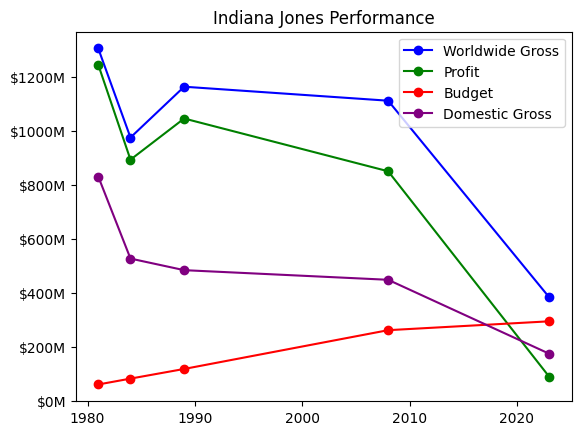

In [477]:
mi_df = linked_movies[linked_movies['BoxOff_Rank'] == 12]
plt.plot(mi_df['Year'], mi_df['Worldwide_Gross'], color='blue', marker='o')
plt.plot(mi_df['Year'], mi_df['Profit'], color='green', marker='o')
plt.plot(mi_df['Year'], mi_df['Production_Budget'], color='red', marker='o')
plt.plot(mi_df['Year'], mi_df['Domestic_Gross'], color = 'purple', marker='o')
plt.legend(['Worldwide Gross', 'Profit', 'Budget', 'Domestic Gross'])
plt.title("Indiana Jones Performance")
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

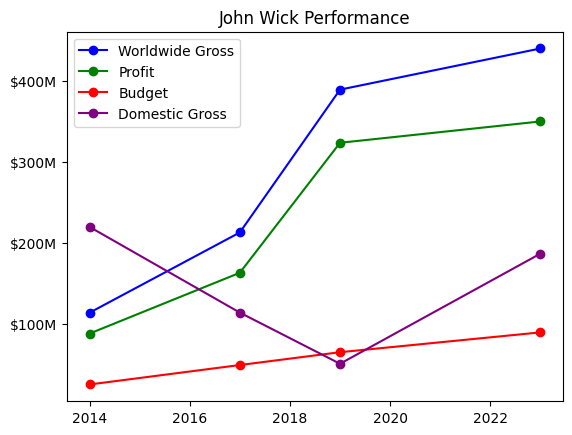

In [478]:
mi_df = linked_movies[linked_movies['BoxOff_Rank'] == 9]
plt.plot(mi_df['Year'], mi_df['Worldwide_Gross'], color='blue', marker='o')
plt.plot(mi_df['Year'], mi_df['Profit'], color='green', marker='o')
plt.plot(mi_df['Year'], mi_df['Production_Budget'], color='red', marker='o')
plt.plot(mi_df['Year'], mi_df['Domestic_Gross'], color = 'purple', marker='o')
plt.legend(['Worldwide Gross', 'Profit', 'Budget', 'Domestic Gross'])
plt.title("John Wick Performance")
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))